## Import Modules

In [53]:
!pip install surprise

In [ ]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
# import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Importing data
reviews = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/California_reviews_c.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
users = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/CA_users_c.csv', usecols= ['user_id', 'is_elite'])

## Elite Reviews Only

In [ ]:
elite_reviews_df = reviews.merge(users, how='left', on=['user_id'], indicator=True)
elite_reviews_df.shape

(239065, 6)

In [ ]:
elite_reviews_df = elite_reviews_df.loc[elite_reviews_df['is_elite'] == True]
elite_reviews_df.shape

(48367, 6)

In [ ]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, business id and stars (in that order).
data = Dataset.load_from_df(elite_reviews_df[['user_id', 'business_id', 'stars']], reader)

## User Based

### 3 Split

##### KNNBasic

In [98]:
KNNBasic_algorithms_UserBased_3Split=[]
KNNBasic_RMSE_scores_UserBased_3Split=[]

In [99]:
## Fit the model with 3 splits
kf = KFold(n_splits=3)
algo = KNNBasic()
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Msd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0344
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0264
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0201


In [100]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0789
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0849
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0895


In [101]:
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 30,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Cosine')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0277
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0391
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0276


In [102]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Cosine_sgd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0338
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0349
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0346


In [103]:
from surprise import KNNBasic
sim_options = {'name': 'msd',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_3Split.append('Msd_Sgd')
KNNBasic_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0373
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0241
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0257


In [104]:
KNNBasic_algorithms_UserBased_3Split

['Msd', 'Pearson_baseline', 'Cosine', 'Cosine_sgd', 'Msd_Sgd']

In [105]:
KNNBasic_RMSE_scores_UserBased_3Split

[1.0201428184601335,
 1.078889341222984,
 1.0276477819086314,
 1.0338024979870486,
 1.0241363734823976]

##### KNNwithMeans

In [94]:
KNNwithMeans_RMSE_scores_UserBased_3Split=[]
KNNwithMeans_algorithms_UserBased_3Split=[]

In [95]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithMeans_algorithms_UserBased_3Split.append('Cosine')
KNNwithMeans_RMSE_scores_UserBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0486
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0504
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0534


In [96]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithMeans_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNwithMeans_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0928
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1079
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1028


In [97]:
KNNwithMeans_RMSE_scores_UserBased_3Split

[1.0486350963899262, 1.0928063263634165]

##### KNNwithBaseline

In [89]:
KNNwithBaseline_algorithms_UserBased_3Split=[]
KNNwithBaseline_RMSE_scores_UserBased_3Split=[]

In [90]:
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithBaseline_algorithms_UserBased_3Split.append('Pearson_baseline')
KNNwithBaseline_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0380
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0410
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0531


In [91]:
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNwithBaseline_algorithms_UserBased_3Split.append('Cosine')
KNNwithBaseline_RMSE_scores_UserBased_3Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0470
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0374
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0478


In [92]:
KNNwithBaseline_algorithms_UserBased_3Split

['Pearson_baseline', 'Cosine']

In [93]:
KNNwithBaseline_RMSE_scores_UserBased_3Split

[1.0380007517454397, 1.0373900980005348]

### 5 Split

##### KNNBasic

In [186]:
KNNBasic_algorithms_UserBased_5Split=[]
KNNBasic_RMSE_scores_UserBased_5Split=[]


In [187]:
## Fit the model with 5 splits

kf = KFold(n_splits=5)
algo = KNNBasic()
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Msd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0163
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0107
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0067
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0193
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0258


In [188]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0674
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0842
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0830
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0741
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0777


In [189]:
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 30,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Cosine')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0194
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0185
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0103
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0190
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0106


In [190]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Cosine_sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0173
RMSE: 1.0173
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0175
RMSE: 1.0175
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0123
RMSE: 1.0123
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0199
RMSE: 1.0199
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0204
RMSE: 1.0204


In [191]:
from surprise import KNNBasic
sim_options = {'name': 'msd',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('Msd_Sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0148
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0111
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0203
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0042
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0210


In [192]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': True ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_UserBased_5Split.append('pearson_baseline_sgd')
KNNBasic_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0525
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0589
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0707
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0615
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0525


In [193]:
KNNBasic_algorithms_UserBased_5Split

['Msd',
 'Pearson_baseline',
 'Cosine',
 'Cosine_sgd',
 'Msd_Sgd',
 'pearson_baseline_sgd']

In [194]:
KNNBasic_RMSE_scores_UserBased_5Split

[1.006710488870544,
 1.0674467269710382,
 1.0103067776804688,
 1.0123320949046128,
 1.0042373645005815,
 1.0524786931039576]

##### KNNWithMeans

In [196]:
KNNWithMeans_algorithms_UserBased_5Split=[]
KNNWithMeans_RMSE_scores_UserBased_5Split=[]

In [197]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_UserBased_5Split.append('Cosine')
KNNWithMeans_RMSE_scores_UserBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0359
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0483
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0314
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0425
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0241


In [198]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNWithMeans_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1020
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0929
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0846
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0802
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0918


In [199]:
KNNWithMeans_algorithms_UserBased_5Split

['Cosine', 'Pearson_baseline']

In [200]:
KNNWithMeans_RMSE_scores_UserBased_5Split

[1.024102588568516, 1.0801876890387763]

##### KNNBaseline

In [206]:
KNNBaseline_algorithms_UserBased_5Split=[]
KNNBaseline_RMSE_scores_UserBased_5Split=[]

In [207]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_UserBased_5Split.append('Pearson_baseline')
KNNBaseline_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0443
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0273
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0441
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0549
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0379


In [208]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': True}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_UserBased_5Split.append('Cosine')
KNNBaseline_RMSE_scores_UserBased_5Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0360
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0261
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0263
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0412
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0507


In [209]:
KNNBaseline_algorithms_UserBased_5Split

['Pearson_baseline', 'Cosine']

In [210]:
KNNBaseline_RMSE_scores_UserBased_5Split

[1.0272922724029543, 1.0261310998185422]

## Item Based

### 3-Split

##### KNNBasic

In [132]:
KNNBasic_algorithms_ItemBased_3Split=[]
KNNBasic_RMSE_scores_ItemBased_3Split=[]

In [135]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0884
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0931
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.1008


In [136]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('cosine')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0645
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0657
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0719


In [137]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('cosine_sgd')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0750
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0703
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0605


In [138]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=3)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_3Split.append('pearson_basline_sgd')
KNNBasic_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0819
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0772
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0817


In [139]:
KNNBasic_algorithms_ItemBased_3Split

['pearson_baseline', 'cosine', 'cosine_sgd', 'pearson_basline_sgd']

In [140]:
KNNBasic_RMSE_scores_ItemBased_3Split

[1.0883800366250969, 1.0644802593629181, 1.0604570661881103, 1.077168429686339]

##### KNNWithmeans

In [143]:
KNNWithMeans_algorithms_ItemBased_3Split=[]
KNNWithMeans_RMSE_scores_ItemBased_3Split=[]

In [144]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_3Split.append('cosine')
KNNWithMeans_RMSE_scores_ItemBased_3Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0387
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0239
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0108


In [145]:
# Fitting with splits 3
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNWithMeans_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0421
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0534
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0534


In [146]:
KNNWithMeans_algorithms_ItemBased_3Split

['cosine', 'pearson_baseline']

In [147]:
KNNWithMeans_RMSE_scores_ItemBased_3Split

[1.0107572477764768, 1.042109033002489]

##### KNNBaseline

In [148]:
KNNBaseline_algorithms_ItemBased_3Split=[]
KNNBaseline_RMSE_scores_ItemBased_3Split=[]

In [149]:
kf = KFold(n_splits=3)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
    
KNNBaseline_algorithms_ItemBased_3Split.append('pearson_baseline')
KNNBaseline_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0608
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0347
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0529


In [150]:
kf = KFold(n_splits=3)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_3Split.append('cosine')
KNNBaseline_RMSE_scores_ItemBased_3Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0530
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0550
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0431


In [151]:
KNNBaseline_algorithms_ItemBased_3Split

['pearson_baseline', 'cosine']

In [152]:
KNNBaseline_RMSE_scores_ItemBased_3Split

[1.0346934818878881, 1.0431334955054536]

### 5-Split

##### KNNBasic

In [155]:
KNNBasic_algorithms_ItemBased_5Split=[]
KNNBasic_RMSE_scores_ItemBased_5Split=[]

In [156]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0817
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0836
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0779
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0803
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0902


In [157]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 15,
               'reg_i': 10
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('cosine')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0581
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0581
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0616
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0588
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0604


In [158]:
from surprise import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False ,
               'shrinkage': 0
               }
bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('cosine_sgd')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0726
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0608
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0518
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0444
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0656


In [159]:
from surprise import KNNBasic
sim_options = {'name': 'pearson_baseline',
               'user_based': False ,
               'shrinkage': 0
               }

bsl_options = {'method': 'sgd',
               'learning_rate': .00005,
               }
algo = KNNBasic(bsl_options=bsl_options, sim_options=sim_options)
kf = KFold(n_splits=5)
scores=[]
for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBasic_algorithms_ItemBased_5Split.append('pearson_baseline_sgd')
KNNBasic_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0744
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0711
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0850
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0641
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0861


In [160]:
KNNBasic_algorithms_ItemBased_5Split

['pearson_baseline', 'cosine', 'cosine_sgd', 'pearson_baseline_sgd']

In [161]:
KNNBasic_RMSE_scores_ItemBased_5Split

[1.0778724556869932, 1.058074699495597, 1.044374155440546, 1.0641216023878957]

##### KNNWithMeans

In [162]:
KNNWithMeans_algorithms_ItemBased_5Split=[]
KNNWithMeans_RMSE_scores_ItemBased_5Split=[]

In [163]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_5Split.append('cosine')
KNNWithMeans_RMSE_scores_ItemBased_5Split.append(min(scores))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0148
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0165
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0162
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0162
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9993


In [164]:
# Fitting with splits 5
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNWithMeans(sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNWithMeans_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNWithMeans_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0373
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0397
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0398
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0395
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0406


In [165]:
KNNWithMeans_algorithms_ItemBased_5Split

['cosine', 'pearson_baseline']

In [166]:
KNNWithMeans_RMSE_scores_ItemBased_5Split

[0.9992982277936794, 1.0372855051656487]

##### KNNBaseline

In [167]:
KNNBaseline_algorithms_ItemBased_5Split=[]
KNNBaseline_RMSE_scores_ItemBased_5Split=[]

In [168]:
kf = KFold(n_splits=5)
sim_options = {'name':'pearson_baseline',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_5Split.append('pearson_baseline')
KNNBaseline_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0498
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0580
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0480
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0630
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0326


In [169]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine',
               'user_based': False}
algo = KNNBaseline(k=3, sim_options = sim_options)
scores=[]
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    scores.append(rmse)
KNNBaseline_algorithms_ItemBased_5Split.append('cosine')
KNNBaseline_RMSE_scores_ItemBased_5Split.append(min(scores))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0495
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0364
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0520
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0550
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0405


In [170]:
KNNBaseline_algorithms_ItemBased_5Split

['pearson_baseline', 'cosine']

In [171]:
KNNBaseline_RMSE_scores_ItemBased_5Split

[1.0326419554319464, 1.0364469817173723]

## Best Parameters using Grid Search

### Grid Search with KNNBasic

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNBasic
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

### Grid Search with KNNWithMeans

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [ ]:
from surprise import KNNWithMeans
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

### Grid Search with KNNBaseline

In [ ]:
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'n_epochs': [5, 10, 15]},
              'k': [2, 3,5],
              'sim_options': {'name': ['msd', 'cosine', 'pearson_baseline'],
                              'min_support': [1, 5, 7],
                              'user_based': [True, False]}
              }

In [52]:
from surprise import KNNBaseline
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

## KNN RMSE PLOTS

### KNN Basic (User Based)

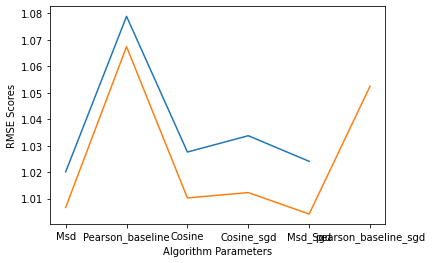

In [195]:
import matplotlib.pyplot as plt
plt.plot(KNNBasic_algorithms_UserBased_3Split, KNNBasic_RMSE_scores_UserBased_3Split)
plt.plot(KNNBasic_algorithms_UserBased_5Split, KNNBasic_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.show()

### KNNBasic Item Based

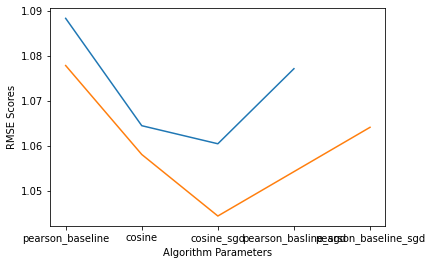

In [185]:
plt.plot(KNNBasic_algorithms_ItemBased_3Split, KNNBasic_RMSE_scores_ItemBased_3Split)
plt.plot(KNNBasic_algorithms_ItemBased_5Split, KNNBasic_RMSE_scores_ItemBased_5Split)

plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.show()

### KNNWithMeans UserBased

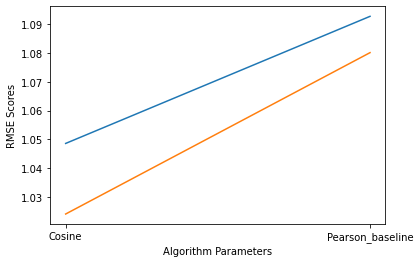

In [201]:
plt.plot(KNNwithMeans_algorithms_UserBased_3Split, KNNwithMeans_RMSE_scores_UserBased_3Split)
plt.plot(KNNWithMeans_algorithms_UserBased_5Split, KNNWithMeans_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.show()

### KNNWithMeans ItemBased

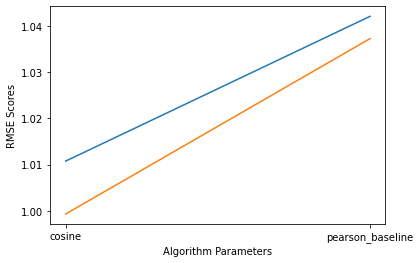

In [203]:
plt.plot(KNNWithMeans_algorithms_ItemBased_3Split, KNNWithMeans_RMSE_scores_ItemBased_3Split)
plt.plot(KNNWithMeans_algorithms_ItemBased_5Split, KNNWithMeans_RMSE_scores_ItemBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.show()

### KNNBaseline UserBased

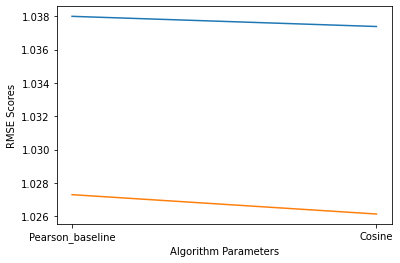

In [211]:
plt.plot(KNNwithBaseline_algorithms_UserBased_3Split, KNNwithBaseline_RMSE_scores_UserBased_3Split)
plt.plot(KNNBaseline_algorithms_UserBased_5Split, KNNBaseline_RMSE_scores_UserBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.show()

### KNNBaseline ItemBased

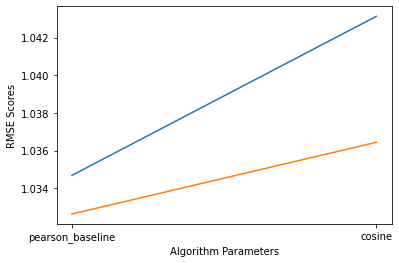

In [212]:
plt.plot(KNNBaseline_algorithms_ItemBased_3Split, KNNBaseline_RMSE_scores_ItemBased_3Split)
plt.plot(KNNBaseline_algorithms_ItemBased_5Split, KNNBaseline_RMSE_scores_ItemBased_5Split)
plt.ylabel('RMSE Scores')
plt.xlabel('Algorithm Parameters')
plt.show()